### Introduction
This Notebook implements a support vector machine classifier and combines different encoding and balancing approaches, aiming to identify the combination on which the SVM-classifier performes best regarding the F2-Score. In addition, a parameter optimization is conducted. The best performing model is then tested by means of a held out test set.

In [1]:
# imports 
from preprocessing.preprocessing_one_hot_encoding import *
from preprocessing.preprocessing_label_encoding import *

from visualization.classification_plots import *
from visualization.general_plots import *

from sklearn.svm import LinearSVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

approach_list = []
acc_list = []
cm_list = []
cr_list = []
f2_list = []

In [3]:
# Evaluation function that calculates and returns evaluation metrics and stores them for later comparison.
def evaluation(target_val, val_predictions, approach):
    approach_list.append(approach)
    acc = metrics.accuracy_score(target_val, val_predictions)
    acc_list.append(acc)
    cm = metrics.confusion_matrix(target_val, val_predictions)
    cm_list.append(cm)
    cr = metrics.classification_report(target_val, val_predictions)
    cr_list.append(cr)
    f2 = metrics.fbeta_score(target_val, val_predictions, beta=2)
    f2_list.append(f2)
    return "Accuracy of {}: {} \nF2-Score of {}: {}".format(approach, acc, approach, f2), plot_confusion_matrix(cm, target_val.Diabetes.unique().tolist())

The following encoding approaches are available:
- Label Encoding (original labels from the initial dataset, refer to the 'Columns.xlsx' for further information)
- One Hot Encoding - Simple (all columns with ordinal values that are not simply yes/no are one hot encoded)
- One Hot Encoding - All (all columns with ordinal values are one hot encoded, including yes/no columns)
    - The one hot encoding is also available for the target dataset if prefered. 

Due to a considerable class imbalance (refer to preprocessing.ipynb), each encoding approach is additionaly available with oversampling or undersampling.

In the following, all three encoding approaches combined with no sampling and undersampling will be used to train and val a LinearSVC classifier by means of a train/val split provided by the respective preprocessing. The target dataset was not one hot encoded for this experiment. In order to maintain a feasible computational effort in regards to the available environment, the **max_iter** parameter of the LinearSVC was set to 500 and the **C** parameter was left on the default value 1.0 for the encoding selection. 



### 1.1  Label Encoding + no sampling

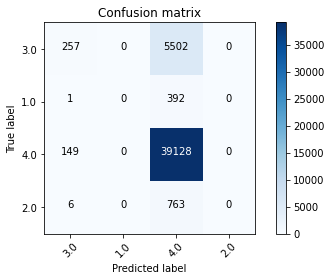

Accuracy of Label Encoding - No Sampling: 0.852526083380233 
F1-Score of Label Encoding - No Sampling: 0.7925443833714555


In [3]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_label_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "Label Encoding - No Sampling")[0])

### 1.2 Label Encoding + undersampling

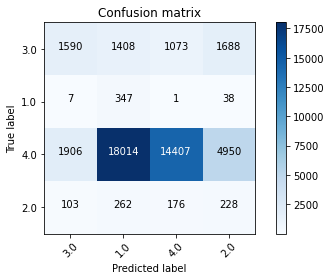

Accuracy of Label Encoding - Undersampled: 0.358716827568293 
F1-Score of Label Encoding - Undersampled: 0.4895488737904005


In [4]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_label_encoded_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "Label Encoding - Undersampled")[0])

### 1.3 Label Encoding + balanced class weights

In [ ]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_label_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500, class_weight='balanced')
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "Label Encoding - balanced class weights")[0])

### 2.1 One Hot Encoding (Simple) + no sampling

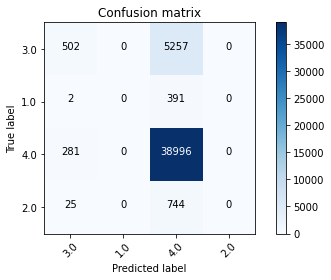

Accuracy of One Hot Encoding - Simple - No Sampling: 0.8549720767132777 
F1-Score of One Hot Encoding - Simple - No Sampling: 0.8022322219087001


In [5]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - Simple - No Sampling")[0])

### 2.2 One Hot Encoding (Simple) + undersampling

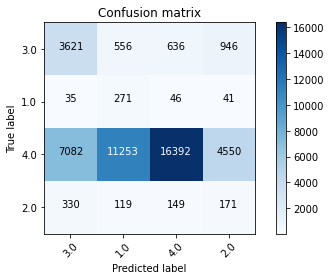

Accuracy of One Hot Encoding - Simple - Undersampled: 0.4427680851984934 
F1-Score of One Hot Encoding - Simple - Undersampled: 0.5482157280420584


In [6]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - Simple - Undersampled")[0])

### 2.3 One Hot Encoding (Simple) + balanced class weights

In [ ]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500, class_weight='balanced')
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - Simple - balanced class weights")[0])

### 3.1 One Hot Encoding (All) + no sampling

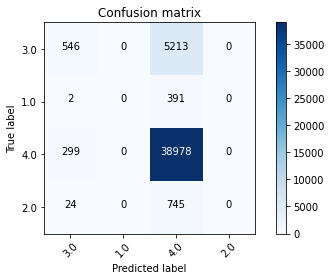

Accuracy of One Hot Encoding - All - No Sampling: 0.855534871639465 
F1-Score of One Hot Encoding - All - No Sampling: 0.8039144369378222


In [7]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - All - No Sampling")[0])

### 3.2 One Hot Encoding (All) + undersampling

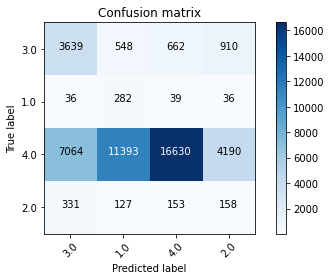

Accuracy of One Hot Encoding - All - Undersampled: 0.44826615870816916 
F1-Score of One Hot Encoding - All - Undersampled: 0.5533363159603082


In [8]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - All - Undersampled")[0])

### 3.3 One Hot Encoding (All) + balanced class weights

In [ ]:
#load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500, class_weights='balanced')
svm.fit(data_train, target_train.values.ravel())
val_predictions = svm.predict(data_val)

#evaluate
print(evaluation(target_val, val_predictions, "One Hot Encoding - All - balanced class weights")[0])

### Comparison

In [10]:
for approach in approach_list:
    print ("F2-Score - {}: {}".format(approach, f2_list[approach_list.index(approach)]))
    print ("Accuracy-Score - {}: {}".format(approach, acc_list[approach_list.index(approach)]))
    print(cr_list[approach_list.index(approach)])
    print()

Weighted F1-Score - Label Encoding - No Sampling: 0.7925443833714555
Accuracy-Score - Label Encoding - No Sampling: 0.852526083380233
              precision    recall  f1-score   support

         1.0       0.62      0.04      0.08      5759
         2.0       0.00      0.00      0.00       393
         3.0       0.85      1.00      0.92     39277
         4.0       0.00      0.00      0.00       769

    accuracy                           0.85     46198
   macro avg       0.37      0.26      0.25     46198
weighted avg       0.80      0.85      0.79     46198


Weighted F1-Score - Label Encoding - Undersampled: 0.4895488737904005
Accuracy-Score - Label Encoding - Undersampled: 0.358716827568293
              precision    recall  f1-score   support

         1.0       0.44      0.28      0.34      5759
         2.0       0.02      0.88      0.03       393
         3.0       0.92      0.37      0.52     39277
         4.0       0.03      0.30      0.06       769

    accuracy          

The comparison shows that, of all applied encoding approaches, the SVM classifier achieves the best accuracy and F1-Score
with the dataset using **One Hot Encoding on all ordinal columns without sampling** of **85.55%** and **0.8039** respectively. 
This approach will further be used for the parameter optimization.

### Parameter Optimization


In [4]:
# load data
data_train, data_val, target_train, target_val = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split()

We want to optimize the following parameters:
- **C**: the regularization parameter that controls the trade-off between the slack variable penalty (misclassifications) and width of the margin. A higher value results in the optimization choosing a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Default = 1.0
- **max_iter**: the maximum number of iterations to be run. Default = 1000

In [6]:
# try different parameter combinations
for c in [0.01, 0.1, 10, 100, 1000]:
    for iter in [200, 500, 1000, 1500, 2000]:
        svm = LinearSVC(C=c, max_iter=iter)
        svm.fit(data_train,target_train.values.ravel())
        val_predictions = svm.predict(data_val)
        print('Accuracy for C = {} and max_iter = {}: {}'.format(c, iter, metrics.accuracy_score(target_val, val_predictions)))
        print('F2-Score for C = {} and max_iter = {}: {}'.format(c, iter, metrics.fbeta_score(target_val, val_predictions, beta=2)))
        print()

Accuracy for C = 0.01 and max_iter = 200: 0.8554482878046669
F1-Score for C = 0.01 and max_iter = 200: 0.8035895909451637

Accuracy for C = 0.01 and max_iter = 500: 0.8554482878046669
F1-Score for C = 0.01 and max_iter = 500: 0.8035895909451637

Accuracy for C = 0.01 and max_iter = 1000: 0.8554482878046669
F1-Score for C = 0.01 and max_iter = 1000: 0.8035895909451637

Accuracy for C = 0.01 and max_iter = 1500: 0.8554482878046669
F1-Score for C = 0.01 and max_iter = 1500: 0.8035895909451637

Accuracy for C = 0.01 and max_iter = 2000: 0.8554482878046669
F1-Score for C = 0.01 and max_iter = 2000: 0.8035895909451637

Accuracy for C = 0.1 and max_iter = 200: 0.855534871639465
F1-Score for C = 0.1 and max_iter = 200: 0.8039144369378222

Accuracy for C = 0.1 and max_iter = 500: 0.855534871639465
F1-Score for C = 0.1 and max_iter = 500: 0.8039144369378222

Accuracy for C = 0.1 and max_iter = 1000: 0.855534871639465
F1-Score for C = 0.1 and max_iter = 1000: 0.8039144369378222

Accuracy for C = 

Of the 25 parameter combinations tested, the parameters **C = XX and max_iter = XX** achieve the best F2-Score of **XXX**.
The LinearSVC achieves the best accuracy for **C = XX and max_iter = XXXX : XXX%**.
However, this is only a  small improvement in comparison to the most simple model (C = 0.01 and max_iter = 200, F2-Score: **XXX**). Hence, following the principle of parsimony (Occam's razor), one might proceed with the simpler model.
Nevertheless, in our case, we propose that the improved performance justifies the selection of the more sophisticated model.



### Testing of final model

In [ ]:
# load data with test data
data_train, data_val, data_test, target_train, target_val, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split(include_test_data=True)

#svm = LinearSVC(C=c, max_iter=iter)
svm.fit(data_train,target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
#print(evaluation(target_test, test_predictions, "Final Model: One Hot Encoding - All - No Sampling - C = & max_iter =")[0])